##Topic : Challenge Set 3
##Subject: Explore Data From boxofficemojo using pandas
##Date: January 21, 2018
##Name: Subramanian Iyer
##Worked With: Worked Individually

In [53]:
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

**Challenge Number 1**

                             Title       Budget  DomesticTotalGross  \
0  The Hunger Games: Catching Fire  130000000.0           424668047   
1                       Iron Man 3  200000000.0           409013994   
2                           Frozen  150000000.0           400738009   
3                  Despicable Me 2   76000000.0           368061265   
4                     Man of Steel  225000000.0           291045518   

                    Director Rating  Runtime          ReleaseDate  
0           Francis Lawrence  PG-13      146  2013-11-22 00:00:00  
1                Shane Black  PG-13      129  2013-05-03 00:00:00  
2     Chris BuckJennifer Lee     PG      108  2013-11-22 00:00:00  
3  Pierre CoffinChris Renaud     PG       98  2013-07-03 00:00:00  
4                Zack Snyder  PG-13      143  2013-06-14 00:00:00  


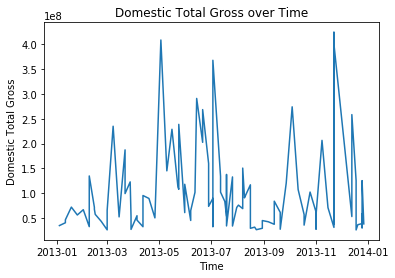

In [12]:
data = pd.read_csv('2013_movies.csv')
print(data.head())
#print(type(data['ReleaseDate'][0]))
data['Date'] = pd.to_datetime(data.ReleaseDate, format = '%Y-%m-%d %H:%M:%S')
data = data.sort_values('Date')
#Could have also done it this way, but let's practice sorting a dataframe
#dates,money = zip(*sorted(zip(data['Date'],data['DomesticTotalGross']),key=lambda x: x[0]))
plt.plot(data['Date'], data['DomesticTotalGross']);
plt.ylabel('Domestic Total Gross ($)');
plt.xlabel('Time');
plt.title('Domestic Total Gross over Time');

**Challenge Number 2**

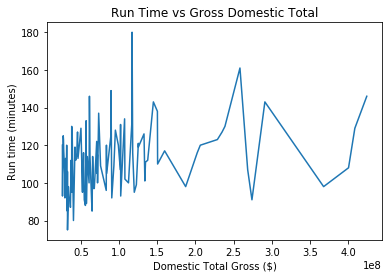

In [15]:
#We'll do it this way this time
money, run = zip(*sorted(zip(data['DomesticTotalGross'],data['Runtime']), key = lambda x: x[0]))
plt.plot(money, run);
plt.ylabel('Run time (minutes)');
plt.xlabel('Domestic Total Gross ($)');
plt.title('Run Time vs Gross Domestic Total');

**Challenge Number 3**

In [16]:
print(data.groupby(['Rating'])[['Runtime', 'DomesticTotalGross']].mean())

           Runtime  DomesticTotalGross
Rating                                
G       107.000000        2.684928e+08
PG       99.933333        1.311357e+08
PG-13   117.510638        1.114498e+08
R       110.729730        6.989243e+07


**Challenge Number 4**

1


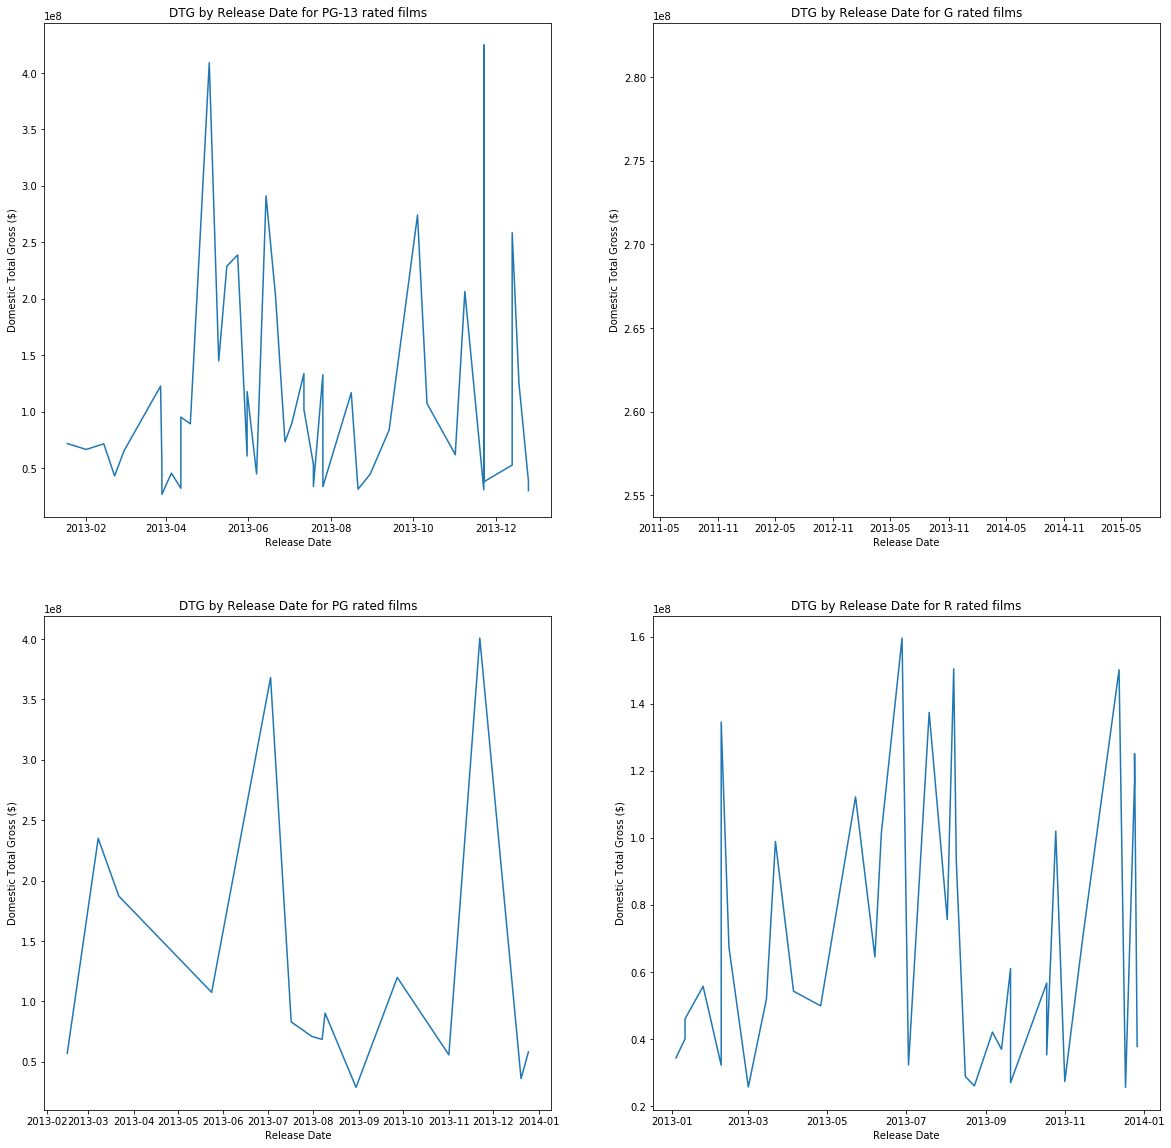

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
def h(j):
    return int(j%2==1)
def v(j):
    return int(j>1)
j = 0
for i in set(data['Rating']):
    datap = data[data['Rating']==i]
    dates,money = zip(*sorted(zip(datap['Date'],datap['DomesticTotalGross']),key=lambda x: x[0]))
    ax[h(j),v(j)].plot(dates, money)
    ax[h(j),v(j)].set_xlabel('Release Date')
    ax[h(j),v(j)].set_ylabel('Domestic Total Gross ($)')
    ax[h(j),v(j)].set_title('DTG by Release Date for '+ i + ' rated films')
    j +=1
print(sum(data['Rating']=='G'))
#Only one G rated film in the dataset, which explains why the G graph looks empty

**Challenge Number 5**

In [33]:
ans = data.groupby(['Director'])[['DomesticTotalGross']].mean().sort_values('DomesticTotalGross', ascending = False)
print(ans.head(1))
print(data['Director'][data['DomesticTotalGross']==np.max(data['DomesticTotalGross'])])
#Francis Lawrence has both the highest mean domestic total gross and the highest domestic total gross.

                  DomesticTotalGross
Director                            
Francis Lawrence           424668047
0    Francis Lawrence
Name: Director, dtype: object


**Challenge Number 6**

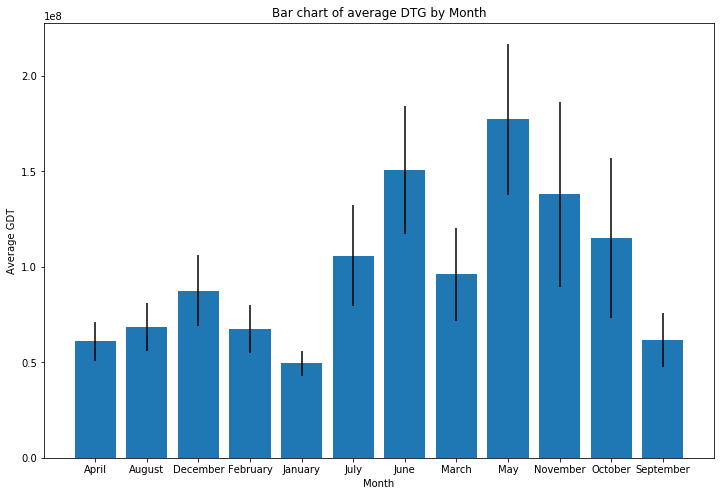

In [62]:
data['Month'] = [t.month for t in data['Date']]
#print(data.columns)
work = data.groupby(['Month'])[['DomesticTotalGross']].mean()
errs = []
for i in sorted(list(set(data['Month']))):
    errs.append(stats.sem(data['DomesticTotalGross'][data['Month']==i]))
#print(work)
#print(work.columns)
#print(work['DomesticTotalGross'])
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#work['Month'] Gives key error, and it doesn't show up as a column. why?
plt.figure(figsize=(12,8))
plt.bar(Months,work['DomesticTotalGross'], yerr = errs)
plt.title('Bar chart of average DTG by Month')
plt.xlabel('Month')
plt.ylabel('Average GDT');